In [1]:
import deBruijnGraph as dbg
import random
sequence = "".join(random.choice("ACGT") for _ in range(100))
sequence

'CCTTATCTTTACCTCGCAACTTCGACGTTAATCACAGGAGAAGCCTTTGAAGCATAAACGGGTGGGTCTGCGGACCTCGTTTATCGTTATCAAGAGGAAA'

In [2]:
from IPython.display import display, HTML

def render_mermaid(graph_definition):
    code = """
    <div class="mermaid">
    {}
    </div>
    <script src="https://cdn.jsdelivr.net/npm/mermaid/dist/mermaid.min.js"></script>
    <script>mermaid.initialize({{startOnLoad:true}});</script>
    """.format(graph_definition)
    display(HTML(code))

render_mermaid(dbg.to_mermaid(dbg.create(sequence, 3)))

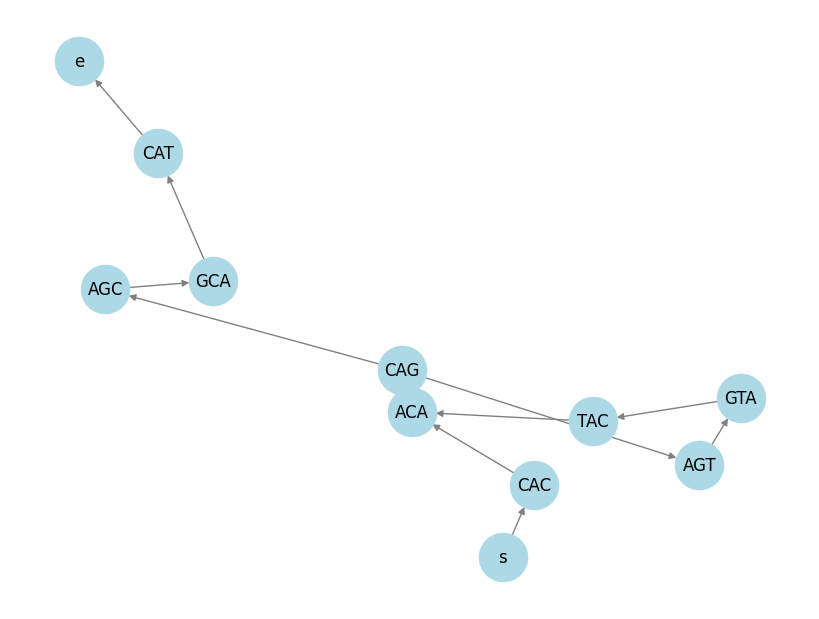

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the edges of the graph
edges = [
    ("s", "CAC"),
    ("CAC", "ACA"),
    ("ACA", "CAG"),
    ("CAG", "AGT"),
    ("AGT", "GTA"),
    ("GTA", "TAC"),
    ("TAC", "ACA"),
    ("ACA", "CAG"),
    ("CAG", "AGC"),
    ("AGC", "GCA"),
    ("GCA", "CAT"),
    ("CAT", "e"),
]

# Create a directed graph
G = nx.DiGraph()

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=1200, edge_color='gray')
plt.show()

In [4]:
from IPython.display import IFrame

def render_mermaid(graph_definition, filename="mermaid_graph.html"):
    code = """
    <!DOCTYPE html>
    <html>
    <body>
    <div class="mermaid">
    {}
    </div>
    <script src="https://cdn.jsdelivr.net/npm/mermaid/dist/mermaid.min.js"></script>
    <script>
    document.addEventListener('DOMContentLoaded', function() {{
        mermaid.initialize({{startOnLoad:true}});
    }});
    </script>
    </body>
    </html>
    """.format(graph_definition)
    with open(filename, "w") as f:
        f.write(code)
    return IFrame(src=filename, width=800, height=600)

graph_definition = """
graph LR
s((start)) -->CAC --> ACA --> CAG --> AGT --> GTA --> TAC --> ACA --> CAG --> AGC --> GCA --> CAT-->e((end))
"""

render_mermaid(graph_definition)

In [5]:
import pygraphviz as pgv
from IPython.display import Image

# Create a new directed graph
G = pgv.AGraph(directed=True)

# Define the edges of the graph
edges = [
    ("s", "CAC"),
    ("CAC", "ACA"),
    ("ACA", "CAG"),
    ("CAG", "AGT"),
    ("AGT", "GTA"),
    ("GTA", "TAC"),
    ("TAC", "ACA"),
    ("ACA", "CAG"),
    ("CAG", "AGC"),
    ("AGC", "GCA"),
    ("GCA", "CAT"),
    ("CAT", "e"),
]

# Add edges to the graph
G.add_edges_from(edges)

# Render the graph to a file (creates a .png file)
G.draw('graph.png', prog='dot', format='png')

# Display the graph
Image(filename='graph.png')

ModuleNotFoundError: No module named 'pygraphviz'